In [1]:
import pandas as pd
import numpy as np

### Users Table

In [3]:
users_names = ['user_id', 'name', 'username', 'email', 'image', 'provider', 'provider_id', 'password', 'remember_token', 'created_at', 'updated_at', 'short_bio']
users = pd.read_csv('users.csv',names = users_names)
users.drop(['password', 'remember_token', 'provider', 'provider_id','image','created_at','updated_at','name'], axis=1, inplace=True)
users.head()

,user_id,username,email,short_bio
0,1,eniayomi,oluwaseyieniayomi@gmail.com,Software Developer | DevOPs Engineer
1,2,DMatrix,okoelijah@gmail.com,Web Developer
2,3,jeff.ogah,jeff.ogah@gmail.com,Front End Developer | React Developer | Mentor...
3,4,nathan,nathanoluwaseyi@gmail.com,| Software Developer | DevOps Engineer | @linu...
4,5,lamar,paulchibiukeigweze@gmail.com,I Am lamar and you don't think am real?


### Posts Table

In [5]:
posts_column =['post_id', 'user_id','title', 'content', 'tags', 'slugs', 'created_at', 'updated_at', 'image', 'status_id', 'action', 'posts_id']
posts = pd.read_csv('posts.csv', names=posts_column)
posts.drop(['content','slugs','image','updated_at','created_at','status_id','action','posts_id'], axis = 1, inplace =True)
posts.head()

,post_id,user_id,title,tags
0,1,2077,What i have learnt so far on HTML,NaN
1,2,1719,HTML BEGINS HERE,Technology
2,4,1310,My Laziness In The Open,NaN
3,6,1787,MY TASK 2,NaN
4,7,167,Task 2,NaN


### Following Table

In [7]:
following_column =['user_id', 'follower_id', 'status']
following = pd.read_csv('following.csv', names=following_column)
following.drop(['status'],axis =1, inplace=True)
following.head()

,user_id,follower_id
0,3,6
1,6,3
2,3,2
3,3,7
4,7,2


### Notifications Table

In [9]:
notification_column = ['not_id','post_id', 'parent_comment_id','comment', 'sender_id','user_id','status','action','type','created_at','updated_at']
notifications = pd.read_csv('notifications.csv', names=notification_column)
notifications.drop(['not_id','user_id','parent_comment_id','status','comment','created_at','updated_at','type',],axis=1,inplace=True)
notifications.head()

,post_id,sender_id,action
0,NaN,4,Followed
1,NaN,1,Followed
2,NaN,3,Followed
3,NaN,1,Followed
4,278.0,1,Commented


### Merging the Users to their posts

In [11]:
df = pd.merge(posts,users,on='user_id')
df.head()

,post_id,user_id,title,tags,username,email,short_bio
0,1,2077,What i have learnt so far on HTML,NaN,obiako4u53,obiako4u53@gmail.com,I am a person of Growth mindset. I believe i c...
1,2,1719,HTML BEGINS HERE,Technology,kolawolejohn,kolawole.oajohn@gmail.com,"I am Kolawole Adebayo Ogunfowokan, I am a trai..."
2,4,1310,My Laziness In The Open,NaN,Oladele,makanjuolaoladele@gmail.com,Front-End enthusiast
3,6,1787,MY TASK 2,NaN,emmanuel.ulaka16,emmanuel.ulaka16@gmail.com,NaN
4,11,1787,MY TASK 2,html,emmanuel.ulaka16,emmanuel.ulaka16@gmail.com,NaN


In [12]:
postings = pd.DataFrame(df.groupby('user_id')['post_id'].count())
postings['no_of_posts'] = pd.DataFrame(df.groupby('user_id')['post_id'].count())
postings.drop(['post_id'],axis=1,inplace=True)
postings.head()

,no_of_posts
user_id,
1,4
2,12
3,15
4,2
5,1


### Merging Posts to Notifications to determine actions taken

In [14]:
main = pd.merge(posts,notifications,on='post_id')
main.head()

,post_id,user_id,title,tags,sender_id,action
0,143,2191,What you have learned so far,NaN,2191,Commented
1,278,4,Good Afternoon People,NaN,1,Commented
2,353,7,TWO YEARS IN THE TRENCHES BUILDING HOTELS.NG,NaN,1,Love
3,355,7,HOW TO AVOID BEING A ONE-HIT WONDER,NaN,1,Like
4,355,7,HOW TO AVOID BEING A ONE-HIT WONDER,NaN,1,Replied


In [15]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60 entries, 0 to 59
Data columns (total 6 columns):
post_id      60 non-null object
user_id      60 non-null int64
title        60 non-null object
tags         5 non-null object
sender_id    60 non-null int64
action       60 non-null object
dtypes: int64(2), object(4)
memory usage: 3.3+ KB


### Checking number of actions per post

In [17]:
post_ids=main['post_id'].value_counts().index
actions=main['post_id'].value_counts().values
post_counts ={'post_id':post_ids,'no_of_actions':actions}
post_counts = pd.DataFrame(post_counts)

### Converting actions to numeric ratings

This will enable us measure the amount of response a user gives to a particular post. It kind of acts like rating an app or a post or any such like actions   

In [19]:
main['action'].value_counts()

Commented    25
Like         15
Love         14
Replied       6
Name: action, dtype: int64

In [20]:
def conv_actions():
    action = []
    for i in main['action']: 
        if i == 'Replied':     # If a user replied a comment on a post, it gets the highest traffic/interaction
            action.append(4)
        elif i == 'Commented': # If a user comments on a post, a considerable amount of interaction has occured
            action.append(3)
        elif i == 'Love':      # If a user reacts with love to a post, it showes a high likeness but no measurable interaction occured
            action.append(2)
        else:
            action.append(1)   # If a user reacts with like, we can consider it the least reaction to a post
    return action

In [21]:
actions = conv_actions()
actions_= pd.DataFrame(actions)
main = pd.concat([main, actions_], axis=1)
main['rated_action'] = main[0]
main.drop(['user_id','tags','action',0], axis=1, inplace=True)

In [89]:
main.head(20)

,post_id,title,sender_id,rated_action
0,143,What you have learned so far,2191,3
1,278,Good Afternoon People,1,3
2,353,TWO YEARS IN THE TRENCHES BUILDING HOTELS.NG,1,2
3,355,HOW TO AVOID BEING A ONE-HIT WONDER,1,1
4,355,HOW TO AVOID BEING A ONE-HIT WONDER,1,4
5,360,EVALUATING STARTUP IDEAS,3,3
6,360,EVALUATING STARTUP IDEAS,4,3
7,360,EVALUATING STARTUP IDEAS,4,4
8,371,Lucid is back,9,3
9,371,Lucid is back,6,3


In [24]:
# This eliminates duplicate posts and at the same time preserves its effect in the data by computing its mean. 
ratings = pd.DataFrame(main.groupby('title')['rated_action'].mean())
ratings.columns

Index(['rated_action'], dtype='object')

In [26]:
# here, we computed the total number of times an observation occured
ratings['num of ratings'] = pd.DataFrame(main.groupby('title')['rated_action'].count())
ratings.head()

,rated_action,num of ratings
title,,
A CHINESE VILLAGER WHO SELLS MORE SOFTWARE DAILY THAN YOU DO,1.500000,2
Am ok,3.500000,2
CEO -- Story so Far,3.000000,3
DON'T ASK WHY YOU WERE REJECTED,1.750000,4
EVALUATING STARTUP IDEAS,3.333333,3


In [35]:
# Some data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
% matplotlib inline

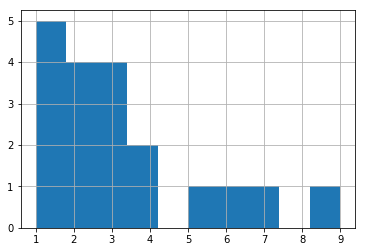

In [32]:
ratings['num of ratings'].hist()    # Obviously, a lot of posts only occured once and a few others occured more than once

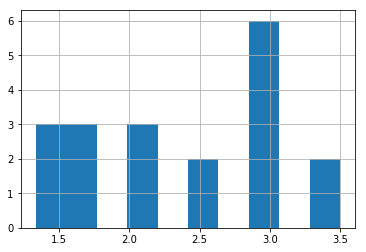

In [33]:
ratings['rated_action'].hist() # Here, we see that the modal rating was 3.0. It appeared majority of users commented on posts they viewed

C:\Users\jjjjjjjjjjjjjjjjjjjj\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


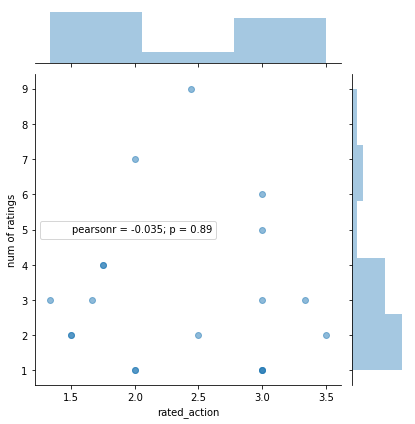

In [36]:
sns.jointplot(x='rated_action',y='num of ratings',data=ratings,alpha=0.5)

## Recommending Similar Posts

In [38]:
postmat = main.pivot_table(index='sender_id', columns='title', values='rated_action')
postmat.head()   # The pivot table was applied here because it is used to convert the dataframe to matrix form from which we can 
# assess the correlation between a datapoint and another. Hence our recommender system

title,A CHINESE VILLAGER WHO SELLS MORE SOFTWARE DAILY THAN YOU DO,Am ok,CEO -- Story so Far,DON'T ASK WHY YOU WERE REJECTED,EVALUATING STARTUP IDEAS,Good Afternoon People,HOW TO AVOID BEING A ONE-HIT WONDER,Lucid is back,My Internship Journey So Far,My first post,TEst,THE SUNFLOWER,TWO YEARS IN THE TRENCHES BUILDING HOTELS.NG,What you have learned so far,Your face PHP script,second,third,this is mine,with picture
sender_id,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,2.0,NaN,3.0,2.5,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,1.0,NaN,NaN
2,NaN,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,2.0,2.333333
3,NaN,NaN,3.0,NaN,3.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,2.0,1.5,NaN,2.666667
4,1.5,NaN,3.0,2.0,3.5,NaN,NaN,NaN,NaN,NaN,2.0,1.5,NaN,NaN,1.0,NaN,NaN,NaN,3.000000
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
postmat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13 entries, 1 to 2191
Data columns (total 19 columns):
A CHINESE VILLAGER WHO SELLS MORE SOFTWARE DAILY THAN YOU DO    1 non-null float64
Am ok                                                           1 non-null float64
CEO -- Story so Far                                             3 non-null float64
DON'T ASK WHY YOU WERE REJECTED                                 3 non-null float64
EVALUATING STARTUP IDEAS                                        2 non-null float64
Good Afternoon People                                           1 non-null float64
HOW TO AVOID BEING A ONE-HIT WONDER                             1 non-null float64
Lucid is back                                                   5 non-null float64
My Internship Journey So Far                                    1 non-null float64
My first post                                                   1 non-null float64
TEst                                                            2

In [40]:
ratings.sort_values('num of ratings',ascending=False).head()

,rated_action,num of ratings
title,,
with picture,2.444444,9
this is mine,2.000000,7
Lucid is back,3.000000,6
My first post,3.000000,5
DON'T ASK WHY YOU WERE REJECTED,1.750000,4


In [41]:
ratings.head()

,rated_action,num of ratings
title,,
A CHINESE VILLAGER WHO SELLS MORE SOFTWARE DAILY THAN YOU DO,1.500000,2
Am ok,3.500000,2
CEO -- Story so Far,3.000000,3
DON'T ASK WHY YOU WERE REJECTED,1.750000,4
EVALUATING STARTUP IDEAS,3.333333,3


#### Let's get our rated_action for the 'with picture' post

In [43]:
withPicture_user_ratings = postmat['with picture']
withPicture_user_ratings.head()

sender_id
1         NaN
2    2.333333
3    2.666667
4    3.000000
6         NaN
Name: with picture, dtype: float64

In [44]:
similar_to_withPicture = postmat.corrwith(withPicture_user_ratings)

C:\Users\jjjjjjjjjjjjjjjjjjjj\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\jjjjjjjjjjjjjjjjjjjj\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [45]:
corr_withPicture = pd.DataFrame(similar_to_withPicture,columns=['Correlation'])
corr_withPicture.dropna(inplace=True)
corr_withPicture.head()

,Correlation
title,
DON'T ASK WHY YOU WERE REJECTED,1.0
EVALUATING STARTUP IDEAS,1.0
Your face PHP script,-1.0
with picture,1.0


In [46]:
corr_withPicture.sort_values('Correlation',ascending=False).head()

,Correlation
title,
DON'T ASK WHY YOU WERE REJECTED,1.0
EVALUATING STARTUP IDEAS,1.0
with picture,1.0
Your face PHP script,-1.0


In [47]:
corr_withPicture = corr_withPicture.join(ratings['num of ratings'])
corr_withPicture.head()

,Correlation,num of ratings
title,,
DON'T ASK WHY YOU WERE REJECTED,1.0,4
EVALUATING STARTUP IDEAS,1.0,3
Your face PHP script,-1.0,4
with picture,1.0,9


In [48]:
corr_withPicture[corr_withPicture['num of ratings']>3].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
title,,
DON'T ASK WHY YOU WERE REJECTED,1.0,4
with picture,1.0,9
Your face PHP script,-1.0,4


In [58]:
print("Posts Title that are highly correlated to 'With Picture' in ascending order are: \n", pd.DataFrame(corr_withPicture.index, index=[1,2,3,4]))

Posts Title that are highly correlated to 'With Picture' are: 
                              title
1  DON'T ASK WHY YOU WERE REJECTED
2         EVALUATING STARTUP IDEAS
3             Your face PHP script
4                     with picture


## To Test:

In [90]:
to_test = input("Enter post title (Exactly as is): ")
to_test = str(to_test)

Enter post title (Exactly as is): Your face PHP script


In [91]:
testdata_user_ratings = postmat[to_test]
# testdata_user_ratings.head()

In [92]:
similar_to_testdata = postmat.corrwith(testdata_user_ratings)

C:\Users\jjjjjjjjjjjjjjjjjjjj\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2526: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\Users\jjjjjjjjjjjjjjjjjjjj\Anaconda3\lib\site-packages\numpy\lib\function_base.py:2455: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [93]:
corr_testdata = pd.DataFrame(similar_to_testdata,columns=['Correlation'])
corr_testdata.dropna(inplace=True)

In [97]:
print("<<------------------------------------------------------------------------------>>")
print("Similar Posts to '",to_test,"' in ascending order are: ")
print("<<------------------------------------------------------------------------------>>\n")
print(pd.DataFrame(corr_testdata.index))

<<------------------------------------------------------------------------------>>
Similar Posts to ' Your face PHP script ' in ascending order are: 
<<------------------------------------------------------------------------------>>

                             title
0  DON'T ASK WHY YOU WERE REJECTED
1             Your face PHP script
2                     with picture


**Observation:** The recommendation method is really basic and would have performed extremely well if the provided data was structured as should be, 
we would have been able to narrow down recommendations to posts with at least 10-15 user ratings.

- A lot went in to the data analysis and we discovered that majority of the data were missing (NaN) and there was no other option other than dropping them, by the time we were able to get a well cleaned data, we were left with less than 50 rows of data. Hopefully we can get a more structured data for recommendation.

**Usage:** 

    - Locate the *To Test:* breakpoint and then enter the presumed post title in the textbox after running that cell (Ensure you enter the title of a post currently in our database (exactly as is)).

Testing the recommender involves having the test input present in the entire dataset (imagine users being recommended similar posts, after the user click on a particular post, then other recommendations will be provided). Our testing here presumes the user has a post he/she is reading, the system will them recommend posts based on similarity/correlation with the current post. 